In [2]:
import cv2  

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml") 
eye_cascade = cv2.CascadeClassifier("haarcascade_eye_tree_eyeglasses.xml")  
  
# capturing frames from a camera 
cap = cv2.VideoCapture(0) 
  
# loop runs if capturing has been initialized. 
while 1:  
  
    # reads frames from a camera 
    ret, img = cap.read()  
  
    # converting to gray scale of each frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
    # Detects faces 
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
  
    for (x,y,w,h) in faces: 
        #drawing a rectangle on a face  
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)  
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = img[y:y+h, x:x+w] 
  
        # Detects eyes
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        #drawing a rectangle on eyes 
        for (ex,ey,ew,eh) in eyes: 
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,127,255),2)
  
    # Displaying an image in a window 
    cv2.imshow('img',img) 
    
    # press ESC to exit the screen
    k = cv2.waitKey(5)
    if k == 27: 
        break
        
cap.release() 
cv2.destroyAllWindows()

### Demonstration of face detection

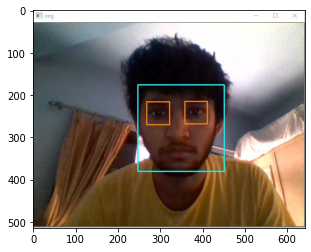

In [3]:
from  matplotlib import pyplot as plt
image = cv2.imread("Face_detection_Demo.jpg")
Demo_image = image[:,:,::-1] 
plt.imshow(Demo_image)
plt.show()